In [1]:
# sets a seeding
import random
random.seed(12)

In [1]:
# loads the required libraries for data analysis and statistical analysis
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

## data loading and preprocessing.

In [3]:
# loads the data and creates a copy of it 
# for ML processes..
f = 'data/loan.csv'
data= pd.read_csv(f)
df = data.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print("No. of columns: ",df.shape[1])
print('No. of rows: ', df.shape[0])

No. of columns:  13
No. of rows:  614


In [6]:
df.isnull().sum(axis=0) # checks for total numbr of missing values in the data..

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe().round(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000,614.000,592.000,600.00,564.000
mean,5403.459,1621.246,146.412,342.00,0.842
std,6109.042,2926.248,85.587,65.12,0.365
min,150.000,0.000,9.000,12.00,0.000
25%,2877.500,0.000,100.000,360.00,1.000
50%,3812.500,1188.500,128.000,360.00,1.000
75%,5795.000,2297.250,168.000,360.00,1.000
max,81000.000,41667.000,700.000,480.00,1.000


In [4]:
df['Dependents'] = df['Dependents'].astype('str') # sets the right data-type for this column

In [5]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', 'nan'], dtype=object)

In [6]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

## check for missing values

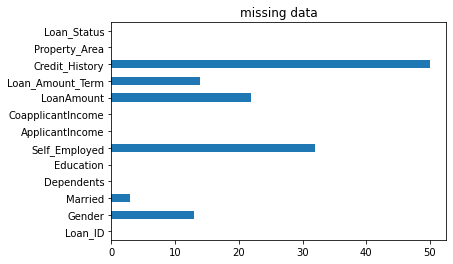

In [7]:
df.isnull().sum().plot(kind= 'barh', title= 'missing data')
plt.show()

In [13]:
numeric_col = ['Loan_Amount_Term', 'LoanAmount']
categorical_col = ['Self_Employed', 'Married', 'Gender']

In [9]:
df.shape

(614, 13)

In [10]:
df.isna().sum()/613

Loan_ID              0.000000
Gender               0.021207
Married              0.004894
Dependents           0.000000
Education            0.000000
Self_Employed        0.052202
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035889
Loan_Amount_Term     0.022838
Credit_History       0.081566
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
# i dropped the row with missing values
# they are less in amount and will not really affect the model performance..
df.dropna(axis = 0, inplace=True)

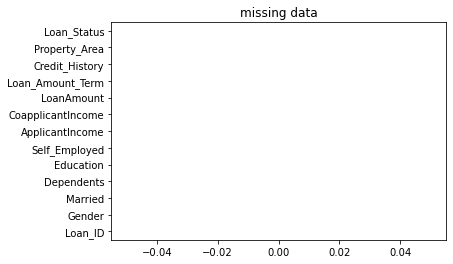

In [12]:
df.isnull().sum().plot(kind= 'barh', title= 'missing data')
plt.show()

In [13]:
df.shape

(490, 13)

## check for normality

In [14]:
numeric_columns= df.select_dtypes('number')
categorical_columns= df.select_dtypes('object')

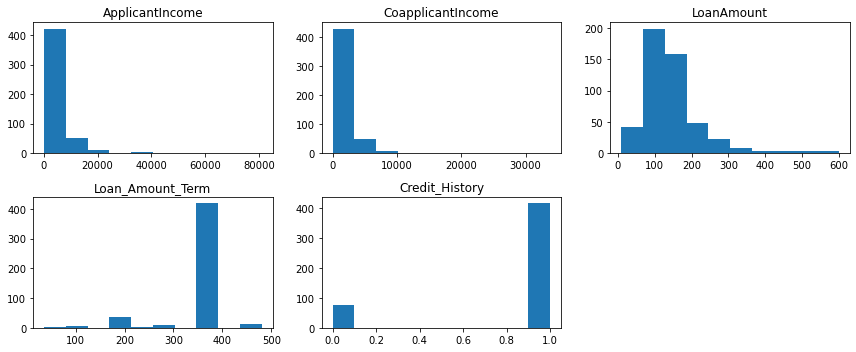

In [15]:
# plots a histogram of each numeric columns
f = plt.figure(figsize= (12, 5))
for index, col in enumerate(numeric_columns.columns):
    
    plt.subplot(2, 3, index+1)
    plt.tight_layout()
    plt.hist(df[col])
    plt.title(col)

**plot the categorical columns**

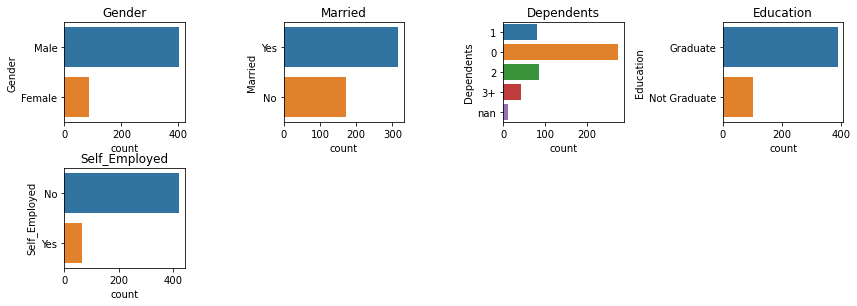

In [16]:
# creates barplot for the categorical column
f2 = plt.figure(figsize= (12, 10))
for index, col in enumerate(categorical_columns.columns[1:-2]):
    
    plt.subplot(5  , 4, index+1)
    plt.tight_layout()
    sns.countplot(y = df[col])
    plt.title(col)
    

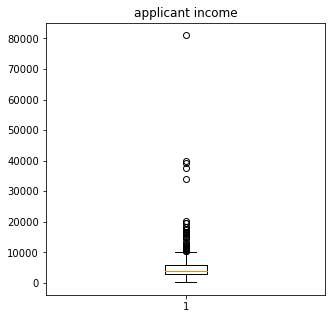

In [17]:
# get the distribution of "applicant's income"
plt.figure(figsize=(5, 5))
plt.boxplot(df['ApplicantIncome'])
plt.title('applicant income')
plt.show()

## feature engineering

In [18]:
# quantiles of "Applicant's income"
dictionary = {}
for i in [.25, .5, .75, .95]:
    q = np.quantile(df['ApplicantIncome'], q = i)
    dictionary[i] = q
    
pd.Series(dictionary, name='applicant income')

0.25     2904.25
0.50     3858.50
0.75     5818.75
0.95    13988.55
Name: applicant income, dtype: float64

In [19]:
# quantiles of "co-Applicant's income"
dictionary1 = {}
for i in [.25, .5, .75, .95]:
    q = np.quantile(df['CoapplicantIncome'], q = i)
    dictionary1[i] = q
    
pd.Series(dictionary1, name='co-applicant income')

0.25       0.00
0.50    1084.50
0.75    2252.25
0.95    4990.15
Name: co-applicant income, dtype: float64

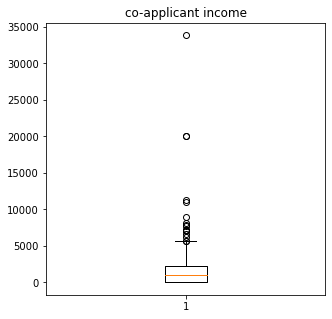

In [20]:
# boxplot of "co-applicant income"
plt.figure(figsize=(5, 5))
plt.boxplot(df['CoapplicantIncome'])
plt.title('co-applicant income')
plt.show()

In [25]:
# creating bins for the "loan amount term"  "applicant income"  and "co applicant" column

[360. 120. 180.  60. 300. 480. 240.  36.  84.]


<AxesSubplot:>

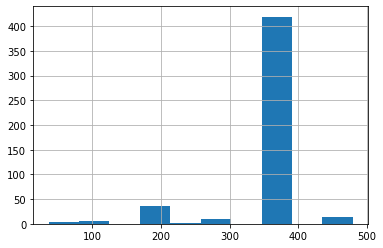

In [21]:
print(df['Loan_Amount_Term'].unique())
df['Loan_Amount_Term'].hist()

In [22]:
# creates bins for "Loan Amount Term" column
df['Loan_Amount_Term1'] = np.where(df['Loan_Amount_Term'].between(10, 100, inclusive='neither'), '10-100', '')
df['Loan_Amount_Term1'] = np.where(df['Loan_Amount_Term'].between(100, 200, inclusive='neither'), '100-200', df['Loan_Amount_Term1'] )
df['Loan_Amount_Term1'] = np.where(df['Loan_Amount_Term'].between(200, 500, inclusive='neither'), '200-500', df['Loan_Amount_Term1'] )

In [23]:
df['Loan_Amount_Term1'].unique()

array(['200-500', '100-200', '10-100'], dtype=object)

In [29]:
# helps me choose the right values 
# during bins creation.

print(np.linspace(0, 25000, 3))
print(np.linspace(0, 10000, 3))

[    0. 12500. 25000.]
[    0.  5000. 10000.]


In [24]:
#we therefore create bins for income
bins= [     0., 12500., 25000., np.inf]
labels = ['0-12.5K','12.5K-25K','25K+']
df['app_income_cut'] =pd.cut(df['ApplicantIncome'], bins = bins, labels=labels)



bins2= [  -1., 5000., 10000., np.inf]
labels2 = ['0-5K','5K-10K','10K+']
df['coapp_income_cut'] =pd.cut(df['CoapplicantIncome'], bins = bins2, labels=labels2)

Text(0.5, 1.0, 'loan amount term (bins)')

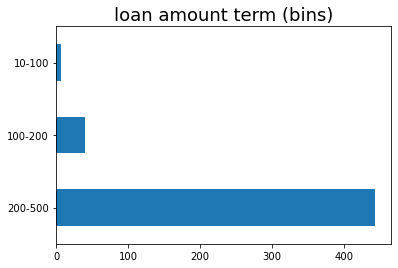

In [25]:
df['Loan_Amount_Term1'].value_counts().plot(kind='barh').set_title('loan amount term (bins)', size=18)

Text(0.5, 1.0, 'applcation amount (bins)')

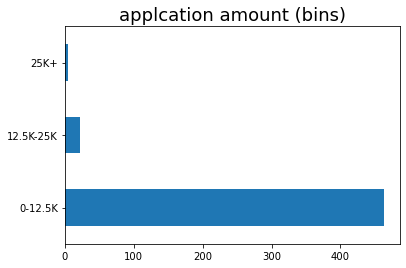

In [26]:
df['app_income_cut'].value_counts().plot(kind='barh').set_title('applcation amount (bins)',size=18)

In [27]:
df['app_income_cut'].unique()

['0-12.5K', '12.5K-25K', '25K+']
Categories (3, object): ['0-12.5K' < '12.5K-25K' < '25K+']

Text(0.5, 1.0, 'coapplicant amount (bins)')

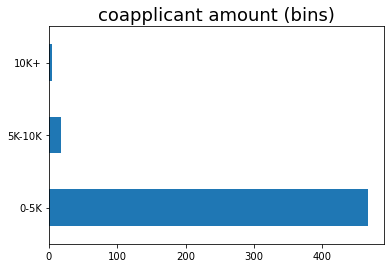

In [28]:
df['coapp_income_cut'].value_counts().plot(kind='barh').set_title('coapplicant amount (bins)', size=18)

In [29]:
df['coapp_income_cut'].unique()

['0-5K', '10K+', '5K-10K']
Categories (3, object): ['0-5K' < '5K-10K' < '10K+']

In [30]:
# final data at a glance
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term1,app_income_cut,coapp_income_cut
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,200-500,0-12.5K,0-5K
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,200-500,0-12.5K,0-5K
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,200-500,12.5K-25K,10K+
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K


Y    0.685714
N    0.314286
Name: Loan_Status, dtype: float64


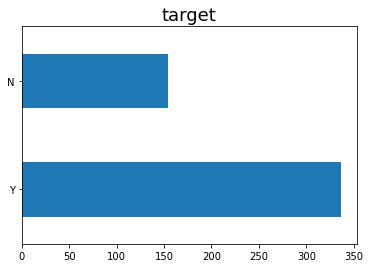

In [31]:
# checks for the distribution of **target** column
f5= df['Loan_Status'].value_counts(normalize= False).plot(kind='barh')
f5.set_title('target', size=18)
print(df['Loan_Status'].value_counts(normalize=True))

## model building process

In [32]:
# Classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# to handle imbalance nature of the target class (if there exist any).
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Imblearn_Pipeline

# model evaluation
from yellowbrick.model_selection import LearningCurve 
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
#from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2
#import eli5

# for pipeline and transformations
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# serialize objects(model)
import pickle
from joblib import dump, load

In [33]:
# encode the target column
df['Loan_StatusNum'] = LabelEncoder().fit_transform(df['Loan_Status'])

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term1,app_income_cut,coapp_income_cut,Loan_StatusNum
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,200-500,0-12.5K,0-5K,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,200-500,0-12.5K,0-5K,1


In [37]:
# these columns are irrelevant for the model building process
# some may cause bias in the prediction, so I dropped them.
df = df.drop(['Loan_ID', 'Loan_Status', 'Gender', 'Married', 'Loan_Status'], axis=1)

In [38]:
df.to_csv('data/clean_data.csv') # save the data to disk

In [39]:
# select the *independent variable* column.
indp_var = list(df)
del indp_var[-1]

In [40]:
# select the explanatory and target columns
X= df.loc[:, indp_var]
y = df['Loan_StatusNum']

In [41]:
X.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_Term1,app_income_cut,coapp_income_cut
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,200-500,0-12.5K,0-5K
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,200-500,0-12.5K,0-5K
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,200-500,0-12.5K,0-5K
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,200-500,0-12.5K,0-5K
5,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,200-500,0-12.5K,0-5K


In [42]:
X.shape

(490, 12)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Dependents         490 non-null    object  
 1   Education          490 non-null    object  
 2   Self_Employed      490 non-null    object  
 3   ApplicantIncome    490 non-null    int64   
 4   CoapplicantIncome  490 non-null    float64 
 5   LoanAmount         490 non-null    float64 
 6   Loan_Amount_Term   490 non-null    float64 
 7   Credit_History     490 non-null    float64 
 8   Property_Area      490 non-null    object  
 9   Loan_Amount_Term1  490 non-null    object  
 10  app_income_cut     490 non-null    category
 11  coapp_income_cut   490 non-null    category
dtypes: category(2), float64(4), int64(1), object(5)
memory usage: 59.5+ KB


In [44]:
y[:5]

1    0
2    1
3    1
4    1
5    1
Name: Loan_StatusNum, dtype: int32

In [45]:
categories = list(X.select_dtypes(['object', 'category']))
numerics = list(X.select_dtypes('number'))

print('numeric columns:\n',numerics)
print()
print('categorical columns:\n',categories)


numeric columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

categorical columns:
 ['Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term1', 'app_income_cut', 'coapp_income_cut']


In [46]:
assert len(X.columns) == len(categories) + len(numerics)

In [47]:
# instantiate the endcoders, transfromers and the classifiers
ohe= OneHotEncoder()
le = LabelEncoder()
minmax= MinMaxScaler()
sc = StandardScaler()
smote = SMOTE()
under = RandomUnderSampler()

clf1 = DecisionTreeClassifier(max_depth=20, max_features=3)
clf2  =RandomForestClassifier(max_depth=15, max_features=10, class_weight='balanced', max_samples=20)
clf3 = LogisticRegression(C= 10, max_iter=1000, class_weight='balance', tol=0.01)

In [48]:
# split the data into train and test sets..
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=12,  stratify=y)

In [49]:
classifiers = [clf1, clf2, clf3]
names = ['decision tree', 'random forest', 'logistic regression']

models_list = []
y_pred_list = []
ypred_prob_list= []
f1_scores_list = []
accuracy_scores_list= []
postive_pred_list = []
negative_pred_list= []

for name, clf in zip(names, classifiers):
    transformer = ColumnTransformer([('one hot', ohe, categories), ('norm', sc, numerics)])
    model = Imblearn_Pipeline([('col transf', transformer), ('smote', smote), (name+' classifier', clf)])
    model.fit(X_train, y_train)
    ypred= model.predict(X_test)
    ypred_prob= model.predict_proba(X_test)
    f1_scores = f1_score(y_test, ypred)
    accuracy_scores= model.score(X_test, y_test)
    ypredprobPositive = ypred_prob[:,[1]].ravel()
    ypredprobNegative = ypred_prob[:,[0]].ravel()
    
    models_list.append(model)
    f1_scores_list.append(f1_scores)
    accuracy_scores_list.append(accuracy_scores)
    
    y_pred_list.append(ypred)
    ypred_prob_list.append(ypred_prob)
    postive_pred_list.append(ypredprobPositive)
    negative_pred_list.append(ypredprobNegative)

    

In [50]:
report = pd.concat([pd.Series(f1_scores_list), pd.Series(accuracy_scores_list)], axis =1,)
report.columns =['f1', 'accuracy']
report.index = names
report

,f1,accuracy
decision tree,0.775281,0.674797
random forest,0.822222,0.739837
logistic regression,0.761905,0.674797


<AxesSubplot:title={'center':'f1 and accuracy'}>

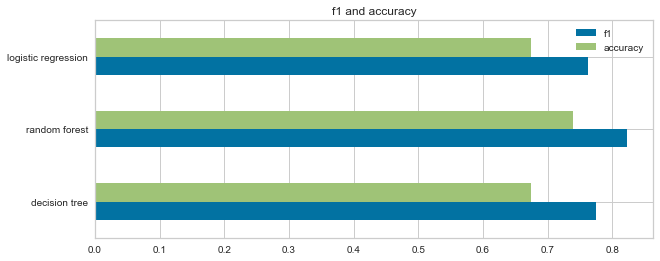

In [51]:
report.plot(kind='barh', title='f1 and accuracy', figsize=(10, 4))

In [52]:
# decision tree 0
# random forest 1
# logistic regression 2
index= 2
p = pd.concat([
           pd.Series(y_pred_list[index]), 
           pd.Series(postive_pred_list[index]), 
           pd.Series(negative_pred_list[index])],axis=1)
p.columns =['pred', '+class', '-class']
p.index = y_test
p

,pred,+class,-class
Loan_StatusNum,,,
1,0,0.380037,0.619963
0,1,0.779004,0.220996
1,0,0.323986,0.676014
0,0,0.045150,0.954850
1,0,0.399810,0.600190
...,...,...,...
1,1,0.842379,0.157621
1,1,0.897123,0.102877
1,1,0.894833,0.105167


In [53]:
# cross validation scores
cv_scores_=[]
for model in models_list: 
    k = KFold(n_splits=20, shuffle=False, random_state=None)
    cv_scores = cross_val_score(model, X = X_train,  y = y_train, cv=k,)
    cv_scores_.append(cv_scores)

<AxesSubplot:>

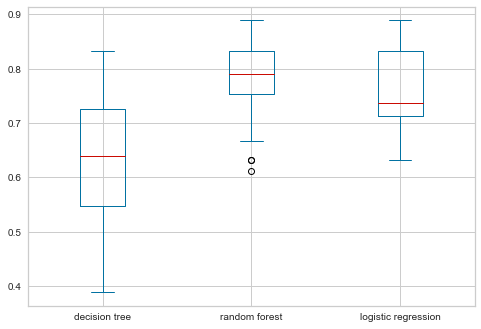

In [54]:
cv = pd.DataFrame(cv_scores_, index=names).T
cv.plot(kind='box')

<AxesSubplot:title={'center':'logistic regression confusion matrix'}>

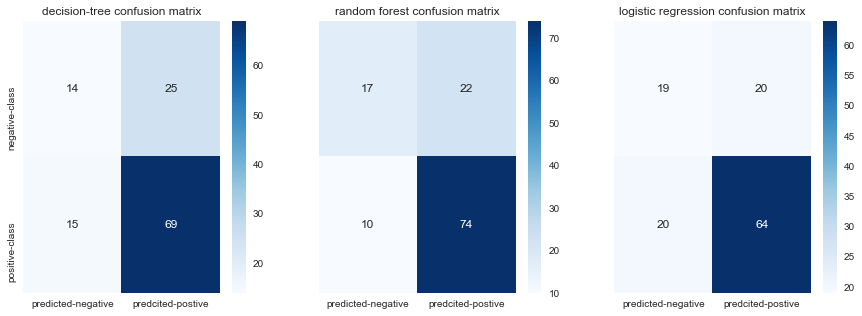

In [55]:
## confusion matrix

fig, ax = plt.subplots(1, 3, figsize= (15, 5), sharey=True)

cm1= confusion_matrix(y_test,y_pred_list[0],)
col= ['predicted-negative', 'predcited-postive']
row= ['negative-class', 'positive-class']
cmdf = pd.DataFrame(cm1, columns=col, index= row)
ax[0].set_title('decision-tree confusion matrix')
sns.heatmap(cmdf , cmap= 'Blues', annot=True, ax=ax[0])


cm1= confusion_matrix(y_test,y_pred_list[1],)
col= ['predicted-negative', 'predcited-postive']
row= ['negative-class', 'positive-class']
cmdf = pd.DataFrame(cm1, columns=col, index= row)
sns.heatmap(cmdf, cmap='Blues', annot=True, ax=ax[1])
ax[1].set_title('random forest confusion matrix')


cm1= confusion_matrix(y_test,y_pred_list[2],)
col= ['predicted-negative', 'predcited-postive']
row= ['negative-class', 'positive-class']
cmdf = pd.DataFrame(cm1, columns=col, index= row)
ax[2].set_title('logistic regression confusion matrix')
sns.heatmap(cmdf , cmap= 'Blues', annot=True, ax=ax[2] )


In [56]:
#classification report
from pprint import pprint
print('CLASSIFICATION REPORT FOR THE DECISION TREE CLASSIFIER')
print(classification_report( y_test, y_pred_list[0]), )


print('\n CLASSIFICATION REPORT FOR THE RANDOM FOREST')
print(classification_report( y_test, y_pred_list[1]), )


print('\n CLASSIFICATION REPORT FOR THE LOGISTIC')
print(classification_report( y_test, y_pred_list[2]), )

CLASSIFICATION REPORT FOR THE DECISION TREE CLASSIFIER
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        39
           1       0.73      0.82      0.78        84

    accuracy                           0.67       123
   macro avg       0.61      0.59      0.59       123
weighted avg       0.65      0.67      0.66       123


 CLASSIFICATION REPORT FOR THE RANDOM FOREST
              precision    recall  f1-score   support

           0       0.63      0.44      0.52        39
           1       0.77      0.88      0.82        84

    accuracy                           0.74       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.73      0.74      0.72       123


 CLASSIFICATION REPORT FOR THE LOGISTIC
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        39
           1       0.76      0.76      0.76        84

    accuracy                           0

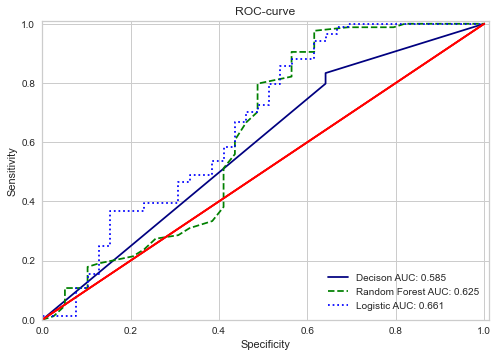

In [63]:
fprdt, tprdt, _ = roc_curve(y_test,postive_pred_list[0])
aucdt = np.round(roc_auc_score(y_test, postive_pred_list[0]), 3)

plt.title('ROC-curve')
plt.plot(fprdt, tprdt, label="Decison AUC: "+str(aucdt), color="navy")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")


fprdt, tprdt, _ = roc_curve(y_test,postive_pred_list[1])
aucdt = np.round(roc_auc_score(y_test, postive_pred_list[1]), 3)
plt.plot(fprdt, tprdt, label="Random Forest AUC: "+str(aucdt), color="green", ls='--')
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])

fprdt, tprdt, _ = roc_curve(y_test,postive_pred_list[2])
aucdt = np.round(roc_auc_score(y_test, postive_pred_list[2]), 3)
plt.plot(fprdt, tprdt, label="Logistic AUC: "+str(aucdt), color="blue", ls=':')
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.legend(loc=4)


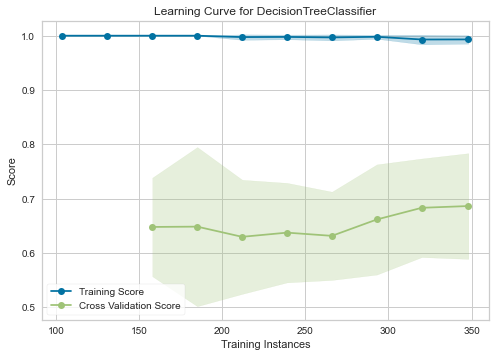

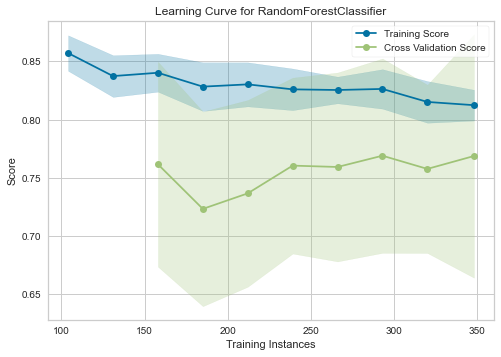

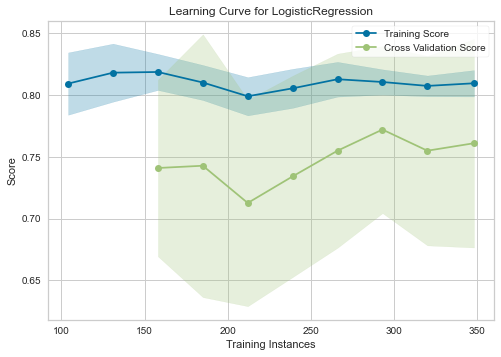

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [64]:
# getting the learning curve

sizes = np.linspace(0.3, 1.0, 10)


visualizer0 = LearningCurve( models_list[0], cv=k, scoring='f1_weighted', train_sizes=sizes, n_jobs=4 )
visualizer0.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer0.show() 


visualizer1 = LearningCurve( models_list[1], cv=k, scoring='f1_weighted', train_sizes=sizes, n_jobs=4 )
visualizer1.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer1.show() 


visualizer2 = LearningCurve( models_list[2], cv=k, scoring='f1_weighted', train_sizes=sizes, n_jobs=4 )
visualizer2.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer2.show() 

In [65]:
# tabulate all models [model name, accuracy score, f1-score]
cv_scores = [np.mean(cv_scores_[0]), np.mean(cv_scores_[1]), np.mean(cv_scores_[2])]

summary1 = pd.DataFrame({
                         'accuracy scores': accuracy_scores_list, 
                         'f1_score': f1_scores_list, 
                         'cv-accuracy scores': cv_scores}, index = names)

In [66]:
summary1

,accuracy scores,f1_score,cv-accuracy scores
decision tree,0.674797,0.775281,0.634795
random forest,0.739837,0.822222,0.777339
logistic regression,0.674797,0.761905,0.755117


In [70]:
# we then retrain and fine-tune the random forest classifier..

rf_pipe = Imblearn_Pipeline([('col transf', transformer), 
                             ('smote', smote), 
                             ('clf', RandomForestClassifier())]
                           )
param_grid = {
    'clf__max_depth': [100, 200],
    'clf__max_features': [3, 5, 8],
    'clf__criterion':['gini', 'entropy']
}
modelGCV = GridSearchCV(rf_pipe, param_grid, n_jobs=-1)
modelGCV.fit(X_train, y_train);

In [72]:
print('model accuracy: ', np.round(modelGCV.score(X_test, y_test)*100,3),'%')

model accuracy:  76.423 %


In [73]:
pred0= modelGCV.predict(X_test)

In [75]:
# classification report
print(classification_report(y_test, pred0))

              precision    recall  f1-score   support

           0       0.71      0.44      0.54        39
           1       0.78      0.92      0.84        84

    accuracy                           0.76       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.76      0.76      0.75       123



## deciding which model to use.

By looking at the **ROC-curve, the learning curve, confusion matrix and the summary table**, *Random Forest Classifier model* will be the model I will choose for deployment. since is less likely for it to overfit by taking gazing at the learning curve, you can see that there is low variance between the train score and the validation score.

Also, the training score decreases through time but it **decrease with a decreasing effect** as compared to that of the logistic regression model which seems decline too fast through time.


<img src= 'images/rf.png' align='left'>
<img src= 'images/dt.png' align='left'>
<img src= 'images/lr.png' align='left'>

In [76]:
# saved the tuned model
dump(modelGCV, 'output/tuned_rf.pkl')

['output/tuned_rf.pkl']